# Описание проекта 
Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Данные по продажам игр до 2016 года. Мы планируем рекламную кампанию на 2017-й в декабре 2016. Отработаем принцип работы с данными.   

*В наборе данных есть аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».*

### Описание данных
- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы долларов)
- `EU_sales` — продажи в Европе (миллионы долларов)
- `JP_sales` — продажи в Японии (миллионы долларов)
- `Other_sales` — продажи в других странах (миллионы долларов)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board).

### Задания по проекту
#### Провести исследовательский анализ данных
- Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Как менялись продажи по платформам. Выберать платформы с наибольшими суммарными продажами и построить распределение по годам. выяснить за какой характерный срок появляются новые и исчезают старые платформы?
- Определить актуальный период в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. данные за предыдущие годы в работе не будем учитывать 
- Выберать несколько потенциально прибыльных платформ.
- Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишисать результаты.
- Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами. Сформулировать выводы.
- Сравнить выводы с продажами игр на других платформах.
- Оценить общее распределение игр по жанрам. Определить самые прибыльные жанры и жанры с высокими и низкими продажами.

#### Составить портрет пользователя каждого региона
- Определить для пользователя каждого региона (NA, EU, JP):
    1. Самые популярные платформы (топ-5). Описать различия в долях продаж.
    2. Самые популярные жанры (топ-5). Выяснить разницу.
    3. Определить влияет ли рейтинг ESRB на продажи в отдельном регионе.
    
####  Проверьте гипотезы
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action и Sports разные.

## Содержание проекта

### [Проверка данных предоставленных для анализа](#data_games)
- #### [Результаты осмотра данных](#data_games_look)

### [Предобработка данных](#pre_data_games)
- #### [Заменa названия столбцов (приведение к нижнему регистру)](#registr)
- #### [Обработка пропусков в данных](#nan_data)    
- #### [Замена типов данных](#type_data)    
- #### [Проверка данных рейтинга ESRB](#rate_esrb)
- #### [Проверка названия игр, жанров, платформ](#name_correct)
- #### [Проверка дубликатов](#dup)
- #### [Расчет суммарных продажи во всех регионах](#sales)
- #### [Результаты проведенной предобработки данных](#end_data)


### [Анализ данных](#analys)
- #### [Количество игр выпускавшихся в разные годы](#games_total)
- #### [Анализ продаж игр по платформам](#games_platform)
- #### [Определение актуального периода для исследования](#games_life)
- #### [Платформы лидеры продаж](#platform_best_sales)
- #### [Анализ влияния отзывов пользователей и критиков на продажи внутри одной популярной платформы](#one_good_platform)
- #### [Анализ влияния отзывов пользователей и критиков на продажи остальных платформы из ТОП-10](#other_platform) 
- #### [Анализ прибыльности игр по жанрам](#analys_genre) 

### [Анализ поведения пользователей из регионов NA, EU, JP](#analys_users) 
- #### [Самые популярные игровые платформы (топ-5)](#users_platform)
- #### [Самые популярные жанры (топ-5)](#users_genre) 
- #### [Влияние рейтинга ESRB на продажи в отдельном регионе](#users_esrb) 

### [Проверка гипотез](#gip) 
- #### [Гипотеза 1 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые](#gip_1)     
- #### [Гипотеза 2 - Средние пользовательские рейтинги жанров Action и Sports разные](#gip_2)

### [Заключение](#end)

In [1]:
# загружаем нужные библиотеки для обработки данных

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import datetime as dt
from scipy import stats as st
from IPython.display import display_html 

### Проверим данные предоставленных для анализа<a name="data_games"></a>

In [2]:
df_games = pd.read_csv('/datasets/games.csv') 
df_games.head()  # проверка

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
df_games.shape  # размер базы

(16715, 11)

11 столбцов и 16715 записей

In [4]:
df_games.info()  # общая информация

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
df_games.describe()   # проверка числовых данных

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Судя по данным продаж большинство игр плохо продается или не продается совсем. Значит для нас важна самая мизерная продажа и пороговое значение на ненужность данных по продажам может быть только 0 в таблице.

**Сколько пропущенных, данных, в %, в каждом столбце базы?**

In [6]:
for col in df_games.columns:
    pct_missing = np.mean(df_games[col].isnull())
    print('{} - {:.2%}'.format(col, pct_missing))

Name - 0.01%
Platform - 0.00%
Year_of_Release - 1.61%
Genre - 0.01%
NA_sales - 0.00%
EU_sales - 0.00%
JP_sales - 0.00%
Other_sales - 0.00%
Critic_Score - 51.32%
User_Score - 40.09%
Rating - 40.48%


#### Результаты осмотра данных<a name="data_games_look"></a>
- Столбцы годы нужно перевести в datatime и выделить год выпуска
- Назания столбцов нужно перевести в нижний регистр
- Проверить пропущенные значения в названиях и жанрах - возможно убрать - всего два значения! особенно если это теже записи.
- Проверить пропущенный значения в "годах выпуска"
- Проверить уникальные значения в жанрах и названиях платформ.
- Перевести название игр - в строчные, проверить уникальность.
- Проверить можно ли перевести рейтинг критиков в целочисленный
- Проверить тип данных "Рейтинг пользователей" перевести в числовой формат
- Проверить другие пропущенные значений в рейтингах, которых от 40 до 50% от всех данных. Слишком много чтобы их просто удалять. Нужно проанализировать нужно ли делать замену сразу на какие либо значения или определится с этим потом когда конкретные данные понадобится для анализа по конкретному заданию.

## Предобработка данных<a name="pre_data_games"></a>

- #### [Замена названия столбцов (приведите к нижнему регистру)](#registr)
- #### [Проверка и обработка пропусков](#nan_data)
    - [Проверка пропусков в названиях и жанрах](#nan_genre)
    - [Проверка пропусков в годах выпуска](#an_year)
    - [Оценка возможности замены других пропущенных значений](#nan_other)
    
- #### [Замена типов данных](#type_data)
    - [Изменение типа данных в столбце "год выпуска"](#year)
    - [Обработка данных по столцам "рейтинги" и проверка значений "tbd"](#rate)
    
- #### [Проверка данных рейтинга ESRB](#rate_esrb)
    - [Создание числового столбца рейтинга ESRB](#rate_esrb_num)

- #### [Проверка названия игр, жанров, платформ](#name_correct)

- #### [Проверка дубликатов](#dup)

- #### [Расчет суммарных продажи во всех регионах](#sales)

- #### [Итог проведенной предобработки данных](#end_data)

#### Переведем название столбцов в строчные <a name="registr"></a>

In [7]:
cols = df_games.columns.str.lower().tolist()  # список всех столбцов
cols # проверка

['name',
 'platform',
 'year_of_release',
 'genre',
 'na_sales',
 'eu_sales',
 'jp_sales',
 'other_sales',
 'critic_score',
 'user_score',
 'rating']

In [8]:
df_games.columns = cols # передаем список названия столбцов в исходную таблицу
df_games.sample()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
3395,2002 FIFA World Cup,PS2,2002.0,Sports,0.21,0.17,0.16,0.06,73.0,5.6,E


### Обработка пропусков данных <a name="nan_data"></a>

**Проверим пропуски в названиях и жанрах - их всего две записи** <a name="nan_genre"></a>

In [9]:
df_games[df_games.name.isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Вот эти два пропуска по названию игры и жанру. Эти две записи составляют 0,01% от всей базы - ничтожно мало. Данные по продажам в одном случае есть внушительные в США 1,78 млн. долл, но по другим ключевым параметрам (нужным нам в рамках задания) - жанр, рейтинги мы не сможем воcстановить данные. Поэтому в этом случае **эти две записи удалим из базы.**

In [10]:
df_games.dropna(subset=['name'], inplace=True)
len(df_games[df_games.name.isnull()])  # проверка, количество записей должно быть 0

0

**Проверим пропуски в годах выпуска**  <a name="nan_year"></a>

In [11]:
df_games[df_games.year_of_release.isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


В базе 1,61% пропусков по признаку "год выпуска", видно что часть из них содержат пропуски в рейтингах и нулевые продажи в большинстве регионов. В нашем анализе эти даннные важны. Проверим данные по нулевой продаже, насколько их много в части базы игр без года выпуска. При этом видно что есть часть записей где можно восстановить год релиза по названию.

In [12]:
year_null = df_games.year_of_release.isnull()   # условие "нет года"

# условие "ноль в продажах по америке"
na_sales_null = df_games.na_sales == 0

# условие "ноль в продажах по европе"
eu_sales_null = df_games.eu_sales == 0

# условие "ноль в продажах по японии"
jp_sales_null = df_games.jp_sales == 0

# условие "ноль в продажах в других странах"
other_sales_null = df_games.other_sales == 0

**Проверим условие - все продажи нулевые**

In [13]:
# продажи во всех регионах = ноль
df_games.loc[jp_sales_null & eu_sales_null & other_sales_null & na_sales_null]   

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16676,G1 Jockey 4 2008,PS3,2008.0,Sports,0.0,0.0,0.0,0.0,NaN,NaN,NaN
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.0,0.0,0.0,0.0,NaN,NaN,NaN


Можем удалять - всего две записи - 0,01% от всего объема данных, эти данные никак нее будут участвовать в исследовании

In [14]:
df_games = df_games.drop(df_games.loc[jp_sales_null & eu_sales_null & other_sales_null & na_sales_null].index)
len(df_games.loc[jp_sales_null & eu_sales_null & other_sales_null & na_sales_null])    # проверка количество строк

0

Удалили записи о нулевых продажах по всем регионам

Проверим условие "нет года" и нулевые продажи по трем регионам последовательно

In [15]:
df_games.loc[na_sales_null & eu_sales_null & other_sales_null & year_null]   

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
3187,Monster Hunter 2,PS2,NaN,Role-Playing,0.0,0.0,0.63,0.0,NaN,NaN,NaN
6899,Danganronpa: Trigger Happy Havoc,PSP,NaN,Misc,0.0,0.0,0.24,0.0,NaN,NaN,NaN
7391,Valkyria Chronicles III: Unrecorded Chronicles,PSP,NaN,Strategy,0.0,0.0,0.21,0.0,NaN,NaN,NaN
8364,Sword of the Samurai,PS2,NaN,Fighting,0.0,0.0,0.17,0.0,NaN,NaN,NaN
9516,Nintendo Puzzle Collection,GC,NaN,Puzzle,0.0,0.0,0.13,0.0,NaN,NaN,NaN
9738,Super Robot Wars OG Saga: Masou Kishin II - Re...,PSP,NaN,Strategy,0.0,0.0,0.12,0.0,NaN,NaN,NaN
9761,Saru! Get You! Million Monkeys,PS2,NaN,Platform,0.0,0.0,0.12,0.0,NaN,NaN,NaN
10258,GiFTPiA,GC,NaN,Role-Playing,0.0,0.0,0.11,0.0,NaN,NaN,NaN
10486,Atsumare! Power Pro Kun no DS Koushien,DS,NaN,Sports,0.0,0.0,0.10,0.0,NaN,NaN,NaN
10764,Luminous Arc 2 (JP sales),DS,NaN,Role-Playing,0.0,0.0,0.10,0.0,NaN,NaN,NaN


In [16]:
len(df_games.loc[na_sales_null & eu_sales_null & other_sales_null & year_null])   

34

По этим записям нет практически всех нужных данных для анализа и таких записей всего 34 -  можем удалять.    
Посмотрим кол-во записей по другим условиям

In [17]:
len(df_games.loc[na_sales_null & jp_sales_null & other_sales_null & year_null])

10

In [18]:
len(df_games.loc[jp_sales_null & eu_sales_null & other_sales_null & year_null])

31

Всего 31 запись, где продажи по Северной Америке минимальны с точки зрения общей базы. Можем удалять эти записи.

**Итого как минимум 1/4 часть (70 записей из 269) записей игр без года релиза "бесполезны" для нас**

In [19]:
df_games[df_games.year_of_release.isnull()] # проверка

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Проверим много ли записей по годам выпуска можно восстановить

In [20]:
df_games[df_games.name.str.contains('200') & df_games.year_of_release.isnull()]  # выпуск игр в 2000-ных

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
1650,NASCAR Thunder 2003,PS2,NaN,Racing,0.60,0.46,0.00,0.16,84.0,8.7,E
2572,PES 2009: Pro Evolution Soccer,PSP,NaN,Sports,0.04,0.33,0.26,0.17,NaN,NaN,NaN
3486,Madden NFL 2002,XB,NaN,Sports,0.53,0.02,0.00,0.03,90.0,8.1,E
4775,NFL GameDay 2003,PS2,NaN,Sports,0.20,0.15,0.00,0.05,60.0,tbd,E
5156,NBA Live 2003,XB,NaN,Sports,0.31,0.04,0.00,0.01,82.0,8.8,E
5655,All-Star Baseball 2005,PS2,NaN,Sports,0.16,0.12,0.00,0.04,72.0,8.6,E
5889,NBA Live 2003,GC,NaN,Sports,0.23,0.06,0.00,0.01,82.0,8.2,E


In [21]:
len(df_games[df_games.name.str.contains('199') & df_games.year_of_release.isnull()]) # выпуск игр в 90-е

0

In [22]:
len(df_games[df_games.name.str.contains('198') & df_games.year_of_release.isnull()]) # выпуск игр в 80-е

0

В 80-х и 90-х нет записей с пропущеными данными в годах выпуска. Пропущенные значения по годам можно восстановить в 2000 годах. Их всего несколько и особой разницы не будет восстановим или нет, но как минимум по 2-3 играм есть хорошие продажи - близкие к максимальным значениям. Поэтому ради любви к искусству спасем хотя бы это.

In [23]:
years = ['2002', '2003', '2004', '2005', '2006', '2007',
         '2008', '2009']   # список строковых значений годов выпуска

for year in years:    # функция заменяющая год выпуска по названию игры
    df_games.loc[df_games.name.str.contains(year), 'year_of_release'] = \
        df_games.loc[df_games.name.str.contains(year), 'year_of_release'].fillna(year)

# проверка на год выпуска = NaN, количество записей должно быть 0
len(df_games[df_games.name.str.contains('200') & df_games.year_of_release.isnull()])  

0

Заменили все данные по годам выпуска которые смогли выяснить по названию.

Удаляем остальные записи без года выпуска.

In [24]:
df_games = df_games.drop(df_games.loc[year_null].index)
len(df_games[df_games.year_of_release.isnull()])    # проверка, кол-во записей должно быть 0

0

**Оценка возможности замены других пропущенных значений**<a name="nan_other"></a>

Большой объем данных (от 40 до 50%) отсутствует в части столбцов с рейтингами. В соотвествии с нашими заданиями рейтинги будут использоваться применительно к разным типам данных - названия, жанры, платформы. Пропуски в данных можно заменить в соответствии с разными допущениями: можно сделать замену по средним значениям рейтинга по платформе, по жанру.    
Допустимо также сделать замену по ближайшему аналогичному релизу игры из другого года выпуска, но это трудоемкий процесс для почти 8000 записей где данные по рейтингам пропущены. Тем более что часть пропущенных  данных естественным образом отсеется когда мы выберем актуальный период для анализа, в соответсвии с заданием.    
Если сделать замену на среднее значение по жанру или платформе на этапе предобработки - получим некорректые данные для одного из случаев - или для платформ или для жанров.    
**Замену отсутствующих значений не будем проводить**, пока в этом не будет необходимости связанной с вычислениями и анализом данных в соответствующих заданиях. Большая часть вычислений позволяет нам оперировать массивами данных не учитывая NaN значения (судя по описаниям pandas)

### Замена типов данных <a name="type_data"></a>

**Переведем данные "год выпуска" во временной формат**<a name="year"></a>

In [25]:
df_games.year_of_release.unique()   # все значения годов выпуска

array([2006.0, 1985.0, 2008.0, 2009.0, 1996.0, 1989.0, 1984.0, 2005.0,
       1999.0, 2007.0, 2010.0, 2013.0, 2004.0, 1990.0, 1988.0, 2002.0,
       2001.0, 2011.0, 1998.0, 2015.0, 2012.0, 2014.0, 1992.0, 1997.0,
       1993.0, 1994.0, 1982.0, 2016.0, 2003.0, 1986.0, 2000.0, 1995.0,
       1991.0, 1981.0, 1987.0, 1980.0, 1983.0], dtype=object)

In [26]:
"""
переведем столбцы годы выпуcка в тип данных "int64", 
так как все равно при округлении datetime до года получаем такой тип данных
"""
df_games.year_of_release = df_games.year_of_release.astype('int64')
df_games.head()    # проверка

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Обработка данных по столцам "рейтинги"**<a name="rate"></a>

In [27]:
df_games.sample(5) # данные ао рейтингам в столбцах "*_score" и "raiting"

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
6704,Medabots AX: Metabee,GBA,2002,Role-Playing,0.18,0.07,0.00,0.00,NaN,NaN,NaN
2820,Star Wars Episode III: Revenge of the Sith,GBA,2005,Action,0.52,0.19,0.00,0.01,73.0,7.5,E10+
939,Chrono Cross,PS,1999,Role-Playing,0.62,0.42,0.69,0.12,94.0,8.1,T
6142,Jackass the Game,PS2,2007,Action,0.14,0.11,0.00,0.04,58.0,6.6,M
6221,Puyo Puyo! 15th Anniversary,DS,2006,Puzzle,0.00,0.00,0.28,0.00,NaN,NaN,NaN


**Переведем значения столбца "Рейтинг пользователей" в числовой формат.**   
*Сначала проверим значение "tbd" в рейтинге*

In [28]:
filter_tbd = df_games.user_score == 'tbd'    # все значения "tbd"
df_tbd = df_games.query('@filter_tbd')
df_tbd.sort_values(by='name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
9507,007: Quantum of Solace,DS,2008,Action,0.11,0.01,0.0,0.01,65.0,tbd,T
11720,10 Minute Solution,Wii,2010,Sports,0.06,0.01,0.0,0.01,NaN,tbd,E
5725,1001 Touch Games,DS,2011,Action,0.11,0.16,0.0,0.04,NaN,tbd,E
7783,101-in-1 Explosive Megamix,DS,2008,Puzzle,0.05,0.12,0.0,0.02,46.0,tbd,E
11388,101-in-1 Sports Megamix,DS,2010,Sports,0.08,0.00,0.0,0.01,NaN,tbd,E10+
...,...,...,...,...,...,...,...,...,...,...,...
10843,thinkSMART,DS,2010,Misc,0.09,0.00,0.0,0.01,NaN,tbd,E
14453,thinkSMART FAMILY!,Wii,2010,Misc,0.03,0.00,0.0,0.00,NaN,tbd,E
16494,thinkSMART: Chess for Kids,DS,2011,Misc,0.01,0.00,0.0,0.00,NaN,tbd,E
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E


*TBD — сокращение от To Be Determined. Служит для отметки неясностей или пропусков, которые надо заполнить, в информации требований. To Be Determined, то есть "Будет определено". Очень часто подобное сокращение можно встретить в анонсах компьютерных игр в графе "Дата выхода". Когда разработчик той или иной игры уже сообщил о том, что она готовится к выходу, но пока еще не может назвать точную дату, именно это сокращение и используется.*

В нашем случае означает что рейтинг должны были определить но так и не сделали этого. Фактически рейтинг не известен - тоже самое что NaN. Это рейтинг пользователей который нам никак не спрогнозировать - величина фактически категоральная хоть и выражена в цифрах. Заменим "TBD" на NaN значения.

In [29]:
df_games.replace('tbd', np.nan, inplace=True)
df_games.user_score.unique()   # проверка

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [30]:
df_games.user_score = df_games.user_score.astype('float')   # переведем столбец в числовой формат
df_games.user_score.dtype   # проверка

dtype('float64')

### Проверка данных рейтинга ESRB<a name="rate_esrb"></a>

In [31]:
df_games.rating.unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [32]:
df_games.rating.value_counts(dropna=False)

NaN     6674
E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

- «AO» («Adults Only 18+») — «Только для взрослых» - 1 игра.
- «RP» («Rating Pending») — «Рейтинг ожидается» - 1 игра.
- «EC» («Early childhood») — «Для детей младшего возраста» - 8 игр
- "K-A" ("Kids to Adults") - 3 игры

Нам предстоит выяснить влияние рейтинг ESRB на продажи в отдельном регионе. Эти категории с незначительным кол-вом игр будут выбиваться из статистики своим малым весом, можно их либо удалить (нежелательно) либо привести к остальным категориям по правилам самой ESRB:  

- "K-A" ("Kids to Adults") = «E» («Everyone») — «Для всех»
- «EC» («Early childhood») — «E» («Everyone») — «Для всех» (так же применимо, судя по описанию)
- «RP» («Rating Pending») — «Рейтинг ожидается» = Nan (без рейтинга)
- «AO» («Adults Only 18+») = «M» («Mature») — «Для взрослых» (для нашего случая допустимое предположение, тем более что это GTA San Andreas на Xbox, а рейтинг 18+ ставился преимущественно на игры для компьютеров)

In [33]:
df_games.loc[df_games.rating == 'AO']   # какая игра с единственным рейтингом 'АО'

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
875,Grand Theft Auto: San Andreas,XB,2005,Action,1.26,0.61,0.0,0.09,93.0,8.6,AO


Переобозначим рейтинги игр

In [34]:
df_games.replace('K-A', 'E', inplace=True)
df_games.replace('EC', 'E', inplace=True)
df_games.replace('RP', np.nan, inplace=True)
df_games.replace('AO', 'M', inplace=True)
df_games.rating.unique() # проверка

array(['E', nan, 'M', 'T', 'E10+'], dtype=object)

**Создание числового столбца рейтинга ESRB** <a name="rate_esrb_num"></a>     
Нам потребуется провести корреляцию по рэйтингам поэтому добавим столбец рейтинга в числовом формате, через словарь 

In [35]:
dict_rating = {'E':1, 'E10+':2,'T':3,'M':4}   # словарь для замены значений
df_games['rating_num'] = df_games.rating.map(dict_rating)
df_games.rating_num.unique()  # проверка

array([ 1., nan,  4.,  3.,  2.])

Все пропуски в стольцах рейтингов оставляем без изменений - удалять большой объем данных нет смысла, заменить отсутсвующие значения фактически категоральных переменных нет возможности.
Заменили рейтинги ESRB на числа
- 1 = «E» («Everyone») — «Для всех»
- 2 = «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»: 
- 3 = «T» («Teen») — «Подросткам»:  
- 4 = «M» («Mature») — «Для взрослых» 

### Проверка названия игр, жанров, платформ <a name="name_correct"></a>

Во избежании пропуска дубликатов, по необходимости, переведем все названия в строчные

In [36]:
df_games.name.unique()   # названия игр

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

In [37]:
df_games.name = df_games.name.str.lower()   # названия игр переводим в строчные
df_games.name.unique()  # проверка

array(['wii sports', 'super mario bros.', 'mario kart wii', ...,
       'woody woodpecker in crazy castle 5', 'lma manager 2007',
       'haitaka no psychedelica'], dtype=object)

In [38]:
df_games.platform.unique()  # все названия платформ

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Названия игровых платформ нет смысла оптимизировать

In [39]:
df_games.genre.unique() # все названия жанров

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

Названия жанров нет смысла оптимизировать

### Проверим и удалим дубликаты<a name="dup"></a>

In [40]:
df_games.duplicated().sum()

0

Дубликатов в базе нет

### Расчет суммарных продажи во всех регионах<a name="sales"></a>

In [41]:
df_games['total_sales'] = df_games['na_sales'] + \
    df_games['eu_sales'] + df_games['jp_sales'] + df_games['other_sales']
df_games.sample()  # проверка

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating_num,total_sales
12212,destrega,PS,1998,Fighting,0.04,0.03,0.0,0.0,NaN,NaN,NaN,NaN,0.07


Сбросим индекс "чистой" таблицы

In [42]:
df_games.reset_index(inplace = True, drop = True)
df_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating_num,total_sales
0,wii sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,1.0,82.54
1,super mario bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,NaN,40.24
2,mario kart wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,1.0,35.52
3,wii sports resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,1.0,32.77
4,pokemon red/pokemon blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,NaN,31.38


In [43]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16442 entries, 0 to 16441
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16442 non-null  object 
 1   platform         16442 non-null  object 
 2   year_of_release  16442 non-null  int64  
 3   genre            16442 non-null  object 
 4   na_sales         16442 non-null  float64
 5   eu_sales         16442 non-null  float64
 6   jp_sales         16442 non-null  float64
 7   other_sales      16442 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9767 non-null   object 
 11  rating_num       9767 non-null   float64
 12  total_sales      16442 non-null  float64
dtypes: float64(8), int64(1), object(4)
memory usage: 1.6+ MB


### Итог проведенной предобработки данных<a name="end_data"></a>

- Названия столбцов перевели в написание с маленькой буквы.
- Проверили пропуски по названию игры и жанру - эти 2 записи удалили из базы
- Проверили и удалили пропуски по признаку "год выпуска" - таких в базе 1,61%. Часть из них содержали пропуски в рейтингах и нулевые продажи в большинстве регионов. В части записей год релиза восстановили по названию игры.
- Провели оценку возможности замены других пропущенных значений - большой объем данных (от 40 до 50%) отсутствует в части столбцов с рейтингами. 
- Решили замену отсутствующих значений не проводить, пока в этом не будет необходимости связанной с вычислениями и анализом данных в соответствующих заданиях. Большую часть ограничений по расчетам данных с NaN можно средствами pandas. Если проводить замену данных сейчас, то далее можем получим некорректые данные для одного из заданий.
- Переведем данные "год выпуска" в формат "int64" 
- Провели анализ значений  "TBD" в рейтинге, заменили его на NaN в соответствии со смыслом выражения "TBD" - рейтинг должен быть определен.
- Провели анализ рейтинга ESRB, выяснили что есть рейтинги с единичными записями:
    - «AO» («Adults Only 18+») — «Только для взрослых» - 1 игра.
    - «RP» («Rating Pending») — «Рейтинг ожидается» - 1 игра.
    - «EC» («Early childhood») — «Для детей младшего возраста» - 8 игр
    - "K-A" ("Kids to Adults") - 3 игры   
- Такие рейтинги заменили на ближайшие им соответсвующие по терминологии ESRB:
    - "K-A" ("Kids to Adults") = «E» («Everyone») — «Для всех»
    - «EC» («Early childhood») — «E» («Everyone») — «Для всех» (так же применимо, судя по описанию)
    - «RP» («Rating Pending») — «Рейтинг ожидается» = Nan (без рейтинга)
    - «AO» («Adults Only 18+») = «M» («Mature») — «Для взрослых».
- Создание числовой аналог столбца рейтинга ESRB для возможности внести этот рейтинг в анализ корреляции.
    - 1 = «E» («Everyone») — «Для всех»
    - 2 = «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»: 
    - 3 = «T» («Teen») — «Подросткам»:  
    - 4 = «M» («Mature») — «Для взрослых»
- Все пропуски в стольцах рейтингов оставили без изменений - заменить отсутсвующие значения фактически категоральных переменных нет возможности.
- Проверили названия игр, жанров, платформ, во избежании пропуска дубликатов, перевели названия игр в написание с маленькой буквы.
- Проверили базу на наличие дубликатов - дубликатов нет.
- Провели переиндексацию данных.

## Анализ данных <a name="analys"></a>
- #### [Количество игр выпускавшихся в разные годы](#games_total). Оценка данных за все периоды.
- #### [Анализ продаж игр по платформам](#games_platform)
- #### [Актуальный период для исследования](#games_life)
- #### [Платформы лидеры продаж](#platform_best_sales)
    - [График глобальных продаж ТОП-10 платформ за 2007-2016 гг.](#platform_best_sales_plot)
    - [Диаграмма размаха по глобальным продажам игр ТОП-10 платформам.](#boxplot_platform)
- #### [Анализ влияния отзывов пользователей и критиков на продажи внутри одной популярной платформы](#one_good_platform)
    - [Диаграмма рассеяния](#daig_ps3) 
    - [Анализ диаграммы рассеяния](#analys_daig_ps3) 
    - [Диаграмма взаимных корреляций](#corr_ps3) 
    - [Анализ диаграммы корреляций](#analys_corr_ps3) 
- #### [Анализ влияния отзывов пользователей и критиков на продажи остальных платформы из ТОП-10](#other_platform) 
    - [Диаграмма рассеяния](#daig_other) 
    - [Анализ диаграммы рассеяния](#analys_daig_other) 
    - [Диаграмма взаимных корреляций](#corr_other) 
    - [Анализ диаграммы корреляций](#analys_corr_other)
- #### [Анализ прибильности игр по жанрам](#analys_genre) 
    - [Таблица распределения игр по жанрам](#table_genre)
    - [График количества игр и глобальных продаж по жанрам](#bar_genre) 
    - [Анализ распределения игр по жанрам](#analys_genre)
    

### Количество игр выпускавшихся в разные годы<a name="games_total"></a>    
Оценка данных за все периоды

In [44]:
df_games.groupby('year_of_release').count()  # посчитаем общее количество выпущенных игр по годам

,name,platform,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating_num,total_sales
year_of_release,,,,,,,,,,,,
1980,9,9,9,9,9,9,9,0,0,0,0,9
1981,46,46,46,46,46,46,46,0,0,0,0,46
1982,36,36,36,36,36,36,36,0,0,0,0,36
1983,17,17,17,17,17,17,17,0,0,0,0,17
1984,14,14,14,14,14,14,14,0,0,0,0,14
1985,14,14,14,14,14,14,14,1,1,1,1,14
1986,21,21,21,21,21,21,21,0,0,0,0,21
1987,16,16,16,16,16,16,16,0,0,0,0,16
1988,15,15,15,15,15,15,15,1,1,1,1,15


В базе рассматриваются игры с 1980 по 2016 гг. Первые 10-12 лет количество игр не превышало 100 ед. Больше 100 игр в год стали выходить начиная с 1994 года. С другой стороны игры стали интересны системам рейтинга начиная с 1997 г. когда количество рейтингов стало около 20, к этому времени число игр приблизилось к отметке 300. С этой точки зрения **актуальный период можно обозначить с 1997 по 2016 гг.**  Пик выхода игр пришелся на 2008 - 2009 гг. - 1425 игр.

**Оценим количество проданных игр за все периоды с помощью графика**

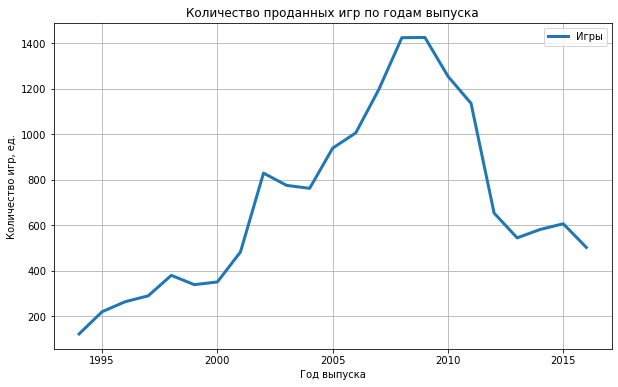

In [45]:
df_games.query('year_of_release >= 1994') \
    .groupby('year_of_release')['name'] \
    .count().plot(figsize=(10, 6), label='Игры', lw=3)
    
plt.title('Количество проданных игр по годам выпуска')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр, ед.')
plt.grid(axis='both')
plt.legend(loc='best');

Рост продаж начался с 1994-1995 гг. (около 200 ед.). Пик продаж пришелся на 2008-2009 гг.(1425 ед.) После этого периода продажи игр стабильно снижаются.

### Анализ продаж игр по платформам  <a name="games_platform"></a>
- Выберем платформы с наибольшими глобальными продажами
- Построим распределение по годам. 
- Определим характерный срок жизни платформ

In [46]:
# подготовим данные по продажам и годам выхода игр для каждой платформы
df_platform = df_games.pivot_table(
    index=['platform', 'year_of_release'], values=['total_sales'], aggfunc='sum')
df_platform.reset_index(inplace=True)
df_platform.sort_values(by='platform')

,platform,year_of_release,total_sales
0,2600,1980,11.38
1,2600,1981,35.68
2,2600,1982,28.88
3,2600,1983,5.84
4,2600,1984,0.27
...,...,...,...
229,XB,2004,65.42
236,XOne,2015,60.14
234,XOne,2013,18.96
235,XOne,2014,54.07


Посчитаем для каждой платформы суммарные продажи и количество лет существования на рынке (по данным на 2016 г.).    
Отсортиуем данные по убыванию кол-ва лет.

In [47]:
df_platform_year = df_platform.pivot_table(
    index=['platform'], values=['year_of_release', 'total_sales'], 
    aggfunc={'year_of_release': 'count', 'total_sales': 'sum'})

df_platform_year.columns = ['total_sales', 'year_count']  # переименовали столбцы

In [48]:
# расположение итоговых таблиц слева направо для лучше визуализации

df1_styler = df_platform_year.sort_values(by='year_count', ascending=False).style.set_table_attributes(
    "style='display:inline'").set_caption('Сортировка по кол-ву лет на рынке')
df2_styler = df_platform_year.sort_values(by='total_sales', ascending=False).style.set_table_attributes(
    "style='display:inline'").set_caption('Сортировка по объему продаж')

display_html(df1_styler._repr_html_() + ' -|- ' + df2_styler._repr_html_(), raw=True)

,total_sales,year_count
platform,,
PC,255.760000,26
GB,254.430000,13
NES,251.050000,12
X360,961.240000,12
PSP,289.530000,12
PS2,1233.560000,12
Wii,891.180000,11
DS,802.780000,11
PS3,931.340000,11


**Характерный "срок жизни" более менее успешных платформ - 10 лет(+/-2 года)**     
**ТОП-6 платформ по продажам за весь период наблюдений**. По остальным платформам продажи меньше более чем в 2 раза от 6 позиции 
1. PS2 - 1233.6 млн.долл.	
2. X360	- 961.2 млн.долл.
3. PS3 - 931.3 млн.долл.
4. Wii - 891.2 млн.долл.
5. DS - 802.8 млн.долл.
6. PS - 727.6 млн.долл.

### Aктуальный период для исследования <a name="games_life"></a>
**Определились с диапазоном для нашего исследования -- 10 последних лет, с 2007 по 2016 гг. (включительно).**   
Создадим соответствующую базу

Если рассматривать тот факт что срок жизни платформ - 10 лет, то если брать период последние 5 лет, в него попадут платформы которые все еще активны на рынке. Поэтому укоротим **актуальный период до 5 лет - с 2012 по 2016 (включительно)**

In [49]:
# отфильтруем базу по актуальному периоду
df_games_ok = df_games.query('year_of_release > 2011')
df_games_ok.reset_index(inplace=True, drop=True)
df_games_ok.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating_num,total_sales
0,grand theft auto v,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,4.0,21.05
1,grand theft auto v,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,4.0,16.27
2,call of duty: black ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,NaN,14.63
3,pokemon x/pokemon y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,NaN,14.60
4,call of duty: black ops ii,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,4.0,13.79


In [50]:
df_games_ok.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2886 entries, 0 to 2885
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2886 non-null   object 
 1   platform         2886 non-null   object 
 2   year_of_release  2886 non-null   int64  
 3   genre            2886 non-null   object 
 4   na_sales         2886 non-null   float64
 5   eu_sales         2886 non-null   float64
 6   jp_sales         2886 non-null   float64
 7   other_sales      2886 non-null   float64
 8   critic_score     1312 non-null   float64
 9   user_score       1531 non-null   float64
 10  rating           1611 non-null   object 
 11  rating_num       1611 non-null   float64
 12  total_sales      2886 non-null   float64
dtypes: float64(8), int64(1), object(4)
memory usage: 293.2+ KB


In [51]:
"База стала меньше на {:.2%}".format(1-len(df_games_ok)/len(df_games))

'База стала меньше на 82.45%'

###  Платформы лидеры продаж <a name="platform_best_sales"></a>
Определим несколько потенциально прибыльных платформ.   
Выберем 10 самых продаваемых платформ за 2012-2016 гг.

In [52]:
# таблица суммарных продаж по платформам.
platform_sales = df_games_ok.pivot_table(
    index=['platform'], values=['total_sales'], aggfunc='sum')
platform_sales_top10 = platform_sales.sort_values(by='total_sales', ascending=False).head(10)

platform_sales_top10  # ТОП-10 платформ по продажам во всех регионах

,total_sales
platform,
PS4,314.14
PS3,288.79
X360,236.54
3DS,194.61
XOne,159.32
WiiU,82.19
PC,62.65
PSV,49.18
Wii,35.37


In [53]:
cols_top10 = platform_sales_top10.index.tolist()  # создадим список ТОП-10 платформ
cols_top10

['PS4', 'PS3', 'X360', '3DS', 'XOne', 'WiiU', 'PC', 'PSV', 'Wii', 'DS']

**Создадим базу ТОП-10 самых продаваемых платформ за 2012-2016 г.**

In [54]:
filter_platform_top10 = df_games_ok['platform'].isin(cols_top10)

# отфильтруем общую базу по платформам из ТОП-10 продаж
platform_top10 = df_games_ok[filter_platform_top10]
platform_top10.head()   # проверка

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating_num,total_sales
0,grand theft auto v,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,4.0,21.05
1,grand theft auto v,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,4.0,16.27
2,call of duty: black ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,NaN,14.63
3,pokemon x/pokemon y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,NaN,14.60
4,call of duty: black ops ii,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,4.0,13.79


In [55]:
platform_top10.shape

(2713, 13)

Немногим меньше отфильтрованной базы 2012-2016 гг.

#### График глобальных продаж ТОП-10 платформ за 2012-2016 гг.  <a name="platform_best_sales_plot"></a>

Подготовим данные

In [56]:
platform_year_top10 = platform_top10.pivot_table(
    index=['platform', 'year_of_release'], values=['total_sales'], aggfunc='sum')
platform_year_top10    # сводная таблица продаж ТОП-10 платформ по годам

total_sales
platform year_of_release             
3DS      2012                   51.36
         2013                   56.57
         2014                   43.76
         2015                   27.78
         2016                   15.14
DS       2012                   11.01
         2013                    1.54
PC       2012                   23.22
         2013                   12.38
         2014                   13.28
         2015                    8.52
         2016                    5.25
PS3      2012                  107.36
         2013                  113.25
         2014                   47.76
         2015                   16.82
         2016                    3.60
PS4      2013                   25.99
         2014                  100.00
         2015                  118.90
         2016                   69.25
PSV      2012                   16.19
         2013                   10.59
         2014                   11.90
         2015                    6.25
         2016                    4.25
Wii      2012                   21.71
         2013                    8.59
         2014                    3.75
         2015                    1.14
         2016                    0.18
WiiU     2012                   17.56
         2013                   21.65
         2014                   22.03
         2015                   16.35
         2016                    4.60
X360     2012                   99.74
         2013                   88.58
         2014                   34.74
         2015                   11.96
         2016                    1.52
XOne     2013                   18.96
         2014                   54.07
         2015                   60.14
         2016                   26.15

Таблица продаж ТОП-10 платформ по годам для построения общего графика

In [57]:
platform_top10_plot = platform_year_top10.pivot_table(
    index='year_of_release', columns='platform', values=['total_sales'], fill_value=0)
platform_top10_plot  

total_sales                                              \
platform                3DS     DS     PC     PS3     PS4    PSV    Wii   
year_of_release                                                           
2012                  51.36  11.01  23.22  107.36    0.00  16.19  21.71   
2013                  56.57   1.54  12.38  113.25   25.99  10.59   8.59   
2014                  43.76   0.00  13.28   47.76  100.00  11.90   3.75   
2015                  27.78   0.00   8.52   16.82  118.90   6.25   1.14   
2016                  15.14   0.00   5.25    3.60   69.25   4.25   0.18   

                                      
platform          WiiU   X360   XOne  
year_of_release                       
2012             17.56  99.74   0.00  
2013             21.65  88.58  18.96  
2014             22.03  34.74  54.07  
2015             16.35  11.96  60.14  
2016              4.60   1.52  26.15

**График глобальных продаж ТОП-10 платформ за период 2012-2016 гг.**

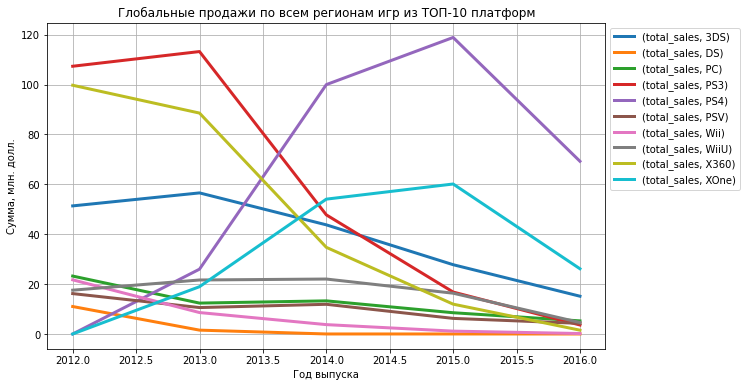

In [58]:
platform_top10_plot.plot(figsize=(10, 6), lw=3)
plt.title('Глобальные продажи по всем регионам игр из ТОП-10 платформ')
plt.xlabel('Год выпуска')
plt.ylabel('Сумма, млн. долл.')
plt.grid(axis='both')
plt.legend(bbox_to_anchor=(1, 1));

*По всем платформам из ТОП-10 глобальных продаж общая выручка к 2016 году стабильно снижается*

#### Диаграмма размаха по глобальным продажам игр ТОП-10 платформам. <a name="boxplot_platform"></a>

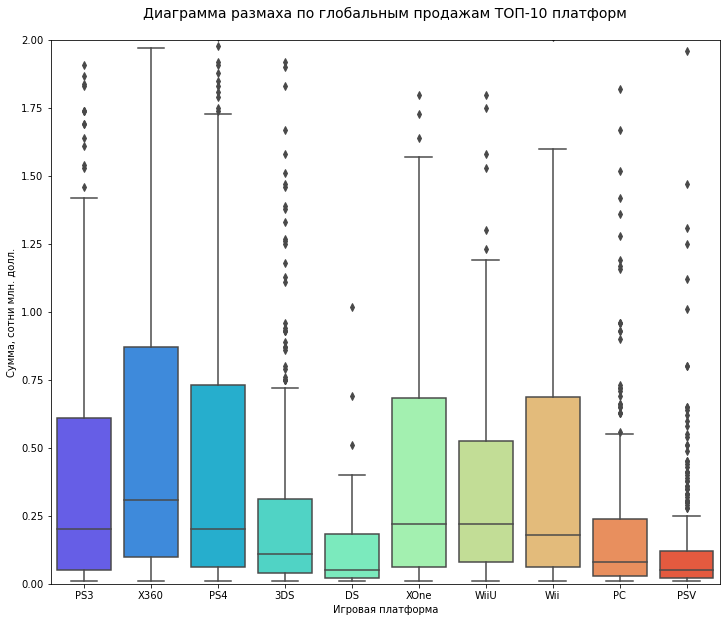

In [59]:
plt.figure(figsize=(12, 10))
plt.ylim(0, 2)
sns.boxplot(x="platform", y="total_sales", data=platform_top10, palette='rainbow')
plt.title('Диаграмма размаха по глобальным продажам ТОП-10 платформ\n  ', fontsize=14)
plt.ylabel('Сумма, сотни млн. долл.')
plt.xlabel('Игровая платформа');

В период 2012-2016 гг. по всем платформам снижается глобальная выручка, в том числе в ТОР10 платформ.  Самыми успешными по продажам в эти 5 лет были Х360, PS3, PS4, XOne и Wii. Медианные значения у этой группы выше чем у остальных - значит снижение продаж было либо позже чем у остальных, либо не таким резким было падение.

### Анализ влияния  отзывов пользователей и критиков на продажи внутри одной популярной платформы  <a name="one_good_platform"></a> 
- Построим диаграмму рассеяния
- Посчитаем корреляцию между отзывами и продажами. 
- Сделаем выводы.

Выберем для анализа самую продаваемую платформу на тот период.

In [60]:
platform_sales_top10.head(3) # самые продаваемые платформы

,total_sales
platform,
PS4,314.14
PS3,288.79
X360,236.54


Рассмотрим для анализа платформу **PS4** (самый большой объем продаж)

Подготовим базу для анализа

In [61]:
# фильтр для отбора игр этой платформы из общей базы ТОП-10
filter_platform_PS4 = platform_top10['platform'].isin(['PS4'])
platform_PS4 = platform_top10[filter_platform_PS4]
platform_PS4.head()   # проверка

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating_num,total_sales
2,call of duty: black ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,NaN,14.63
6,grand theft auto v,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,4.0,12.62
14,fifa 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,1.0,8.58
17,star wars battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,NaN,7.98
18,call of duty: advanced warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,4.0,7.66


**Диаграмма рассеяния по платформе PS4**  <a name="daig_ps3"></a> 

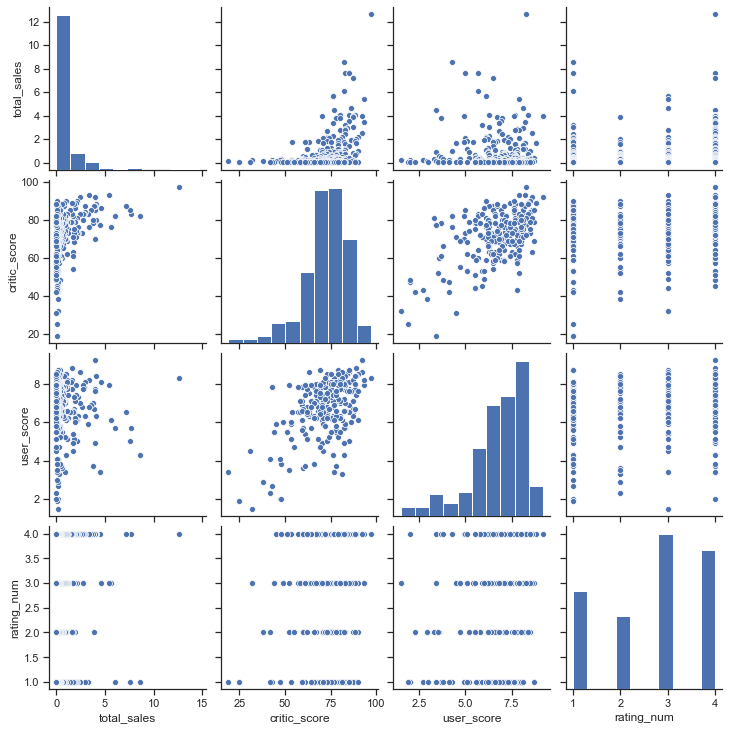

In [62]:
# выберем данные по которым строим диаграмму
cols = ['total_sales', 'critic_score', 'user_score', 'rating_num']
sns.set(style="ticks", color_codes=True)
sns_plot = sns.pairplot(platform_PS4[cols]);

#### Анализ диаграммы рассеяния: <a name="analys_daig_ps3"></a> 
- Связь между объемами продаж и отзывами критиков и пользователей заметная - лучше продаются те игры на которые больше положительных отзывов. Есть положительные отзывы на малопродаваемые игры
- Отзывы критиков и пользователей связаны - скорее всего связь такая - пользователи по высоким рекомендациям критиков покупают игры и затем их же оценивают. Соответственно, те игры где оценки критики невысокие - не попадают в поле зрения массового пользователя.
- В основном отзывы критиков и пользователей это показатели оценок выше среднего, примерно 3/4 от максимума
- Встречаются высокие единичные оценки на игры которые плохо продаются. 
- По рейтингу ESRB следующая картина:
    - 1 - категория «Для всех»
        - третьи в продажах
        - вторые по отзывам критиков
    - 2 - категория «Для всех от 10 лет и старше» 
         - самые низкие продажи
         - меньше всего отзывов критиков и пользователей
    - 3 - категория «Подросткам» 
         - больше всего в количестве проданных игр
    - 4 - категория «Для взрослых» 
        - вторые по кол-ву проданных игр
        - первые по объему продаж
        - больше всего отзывов критиков

**Диаграмма взаимных корреляций, по игровой платформе PS4, данных по продажам и рейтингам критиков, пользователей и ESRB** <a name="corr_ps3"></a> 

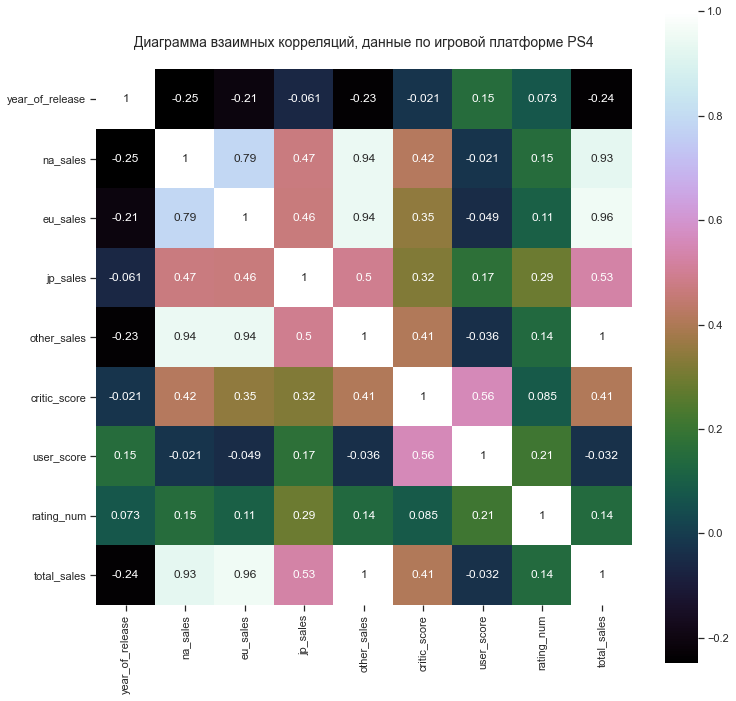

In [63]:
correlation = platform_PS4.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='cubehelix')
plt.title('Диаграмма взаимных корреляций, данные по игровой платформе PS4\n    ', fontsize=14);

#### Анализ диаграммы корреляций:  <a name="analys_corr_ps3"></a> 
- Высокое значение корреляции между общими продажами и продажами по Северной Америке, Европе = 0,93 - 0,96.
- Прямая зависимость общих продаж от продаж в других странах 
- По Японии показатель слабый = 0,53. Следовательно Япония вносит заметно меньший вклад в суммарные продажи по всему миру, в отличии от остальных регионов.
- Влияние отзывов критиков на продажи есть, но не такое явное как предполагалось по диаграммам рассеяния. По всем регионам и по общим продажам оно в пределах 0,35-0,42 ед.
- В Японии влияние каких-либо рейтингов на продажи игр мало.
- Отзывы критиков действительно не сильно влияют на оценки пользователей - тут коэф. корреляции = 0,56.
- По рейтингу ESRB не оказывает заметного влияния на другие показатели, что естественно потому что носит информативный характер в выборе игр.

### Анализ влияния  отзывов пользователей и критиков на продажи остальных платформ из ТОП-10  <a name="other_platform"></a> 
- Построим диаграмму рассеяния
- Посчитаем корреляцию между отзывами и продажами. 
- Сделаем выводы.

In [64]:
platform_top10.head() # исходная база

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating_num,total_sales
0,grand theft auto v,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,4.0,21.05
1,grand theft auto v,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,4.0,16.27
2,call of duty: black ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,NaN,14.63
3,pokemon x/pokemon y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,NaN,14.60
4,call of duty: black ops ii,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,4.0,13.79


Фильтруем данные по признаку - "все платформы кроме PS4"

In [65]:
platform_top10_other = platform_top10[~filter_platform_PS4]
platform_top10_other.platform.unique() # проверка

array(['PS3', 'X360', '3DS', 'DS', 'XOne', 'WiiU', 'Wii', 'PC', 'PSV'],
      dtype=object)

**Диаграмма рассеяния по другим платформам**  <a name="daig_other"></a> 

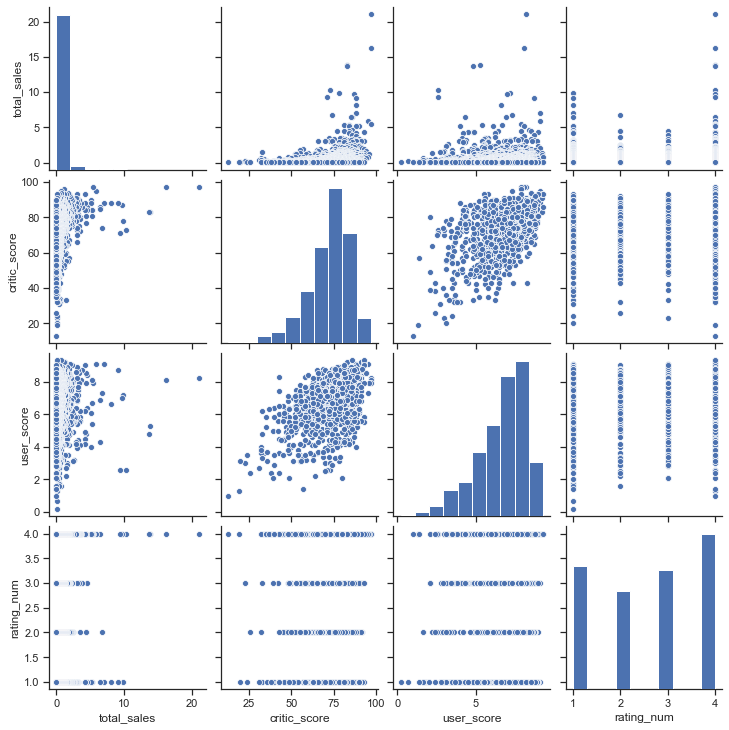

In [66]:
sns.set(style="ticks", color_codes=True)
sns_plot = sns.pairplot(platform_top10_other[cols])

#### Анализ диаграммы рассеяния -- Другие платформы vs PS4:  <a name="analys_other"></a> 
- Аналогично связь между объемами продаж и отзывами критиков и пользователей заметная - лучше продаются те игры на которые больше положительных отзывов. 
- Также отзывы критиков и пользователей заметно связаны. Тот же широкий охват вариаций рейтингов, прибавился объем низких рейтингов и отзывов на игры. 
- В этом случае основные отзывы критиков и пользователей это показатели оценок выше среднего и до 3/4 от максимума.
- Также встречаются высокие единичные оценки на игры которые плохо продаются. 
- По рейтингу ESRB следующая картина:
    - 1 - категория «Для всех»
        - вторые в продажах (в PS4 №3)
        - вторые по количеству проданных игр
    - 2 - категория «Для всех от 10 лет и старше» 
         - меньше всего игр в этой категории
    - 3 - категория «Подросткам» 
         - самые низкие продажи
         - третьи в количестве проданных игр (в PS4 №1)
    - 4 - категория «Для взрослых» 
        - первые по кол-ву проданных игр (в PS4 №2)
        - первые по объему продаж (в PS4 №1)

**Диаграмма взаимных корреляций, по другим игровым платформам, данных по продажам и рейтингам критиков, пользователей и ESRB** <a name="corr_other"></a> 

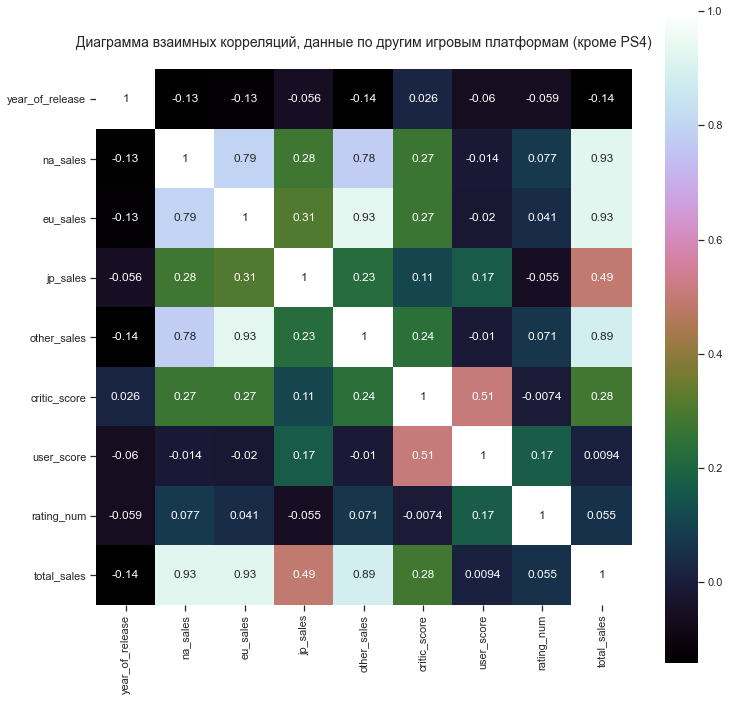

In [67]:
correlation = platform_top10_other.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='cubehelix')
plt.title('Диаграмма взаимных корреляций, данные по другим игровым платформам (кроме PS4)\n    ', fontsize=14);

#### Анализ диаграммы корреляций -- **Другие платформы vs PS4:<a name="analys_corr_other"></a> 
- Также высокое значение корреляции между общими продажами и продажами по Северной Америке, Европе и других странах = 0,89 - 0,93 ед., по Японии показатель незначительно снизился = 0,49 vs 0,53 ед.
- Влияние отзывов критиков на продажи стало заметно меньше - 0,28 (в среднем) vs 0,41 ед. Все остальные рейтинги никак не влияют на продажи - значение корреляций ничтожно мало.
- Также в Японии влияние каких-либо рейтингов на продажи игр мало.
- Отзывы критиков также мало влияют на оценки пользователей = 0,51 vs 0,53 ед.
- Рейтинг ESRB не оказывает заметного влияния на другие показатели, что естественно потому что носит информативный характер в выборе игр.

### Анализ прибильности игр по жанрам <a name="analys_genre"></a> 
- Рассмотрим общее распределение игр по жанрам. 
- Определим самые прибыльные жанры 
- Определим жанры с высокими и низкими продажами

In [68]:
df_games_ok.head() # исходная база

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating_num,total_sales
0,grand theft auto v,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,4.0,21.05
1,grand theft auto v,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,4.0,16.27
2,call of duty: black ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,NaN,14.63
3,pokemon x/pokemon y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,NaN,14.60
4,call of duty: black ops ii,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,4.0,13.79


**Таблица распределения игр по жанрам**<a name="table_genre"></a> 

In [69]:
# подготовим таблицу
genre_sales = df_games_ok.pivot_table(
    index=['genre'], values=['total_sales', 'name'], aggfunc={'total_sales':'sum', 'name':'count'})\

# переименуем столбцы
genre_sales.columns = ['name_count', 'total_sales']

#введем показатель продаж - сколько одна игра зарабатывает млн. долл.
genre_sales['share_sales'] = genre_sales.loc[:, 'total_sales'] / genre_sales.loc[:, 'name_count']

genre_sales = genre_sales.sort_values(by='total_sales', ascending=False)
genre_sales

,name_count,total_sales,share_sales
genre,,,
Action,1031,441.12,0.427856
Shooter,235,304.73,1.296723
Role-Playing,370,192.80,0.521081
Sports,268,181.07,0.675634
Misc,192,85.04,0.442917
Platform,85,61.00,0.717647
Racing,115,53.50,0.465217
Fighting,109,44.49,0.408165
Simulation,80,35.12,0.439000


Больше всего продаж в жанре "Action" - 441,2 млн. долл. 
Второе место у жанра "Shooter" - 304,73 млн. долл. 

**График количества проданных игр и глобальных продаж по жанрам** <a name="bar_genre"></a> 

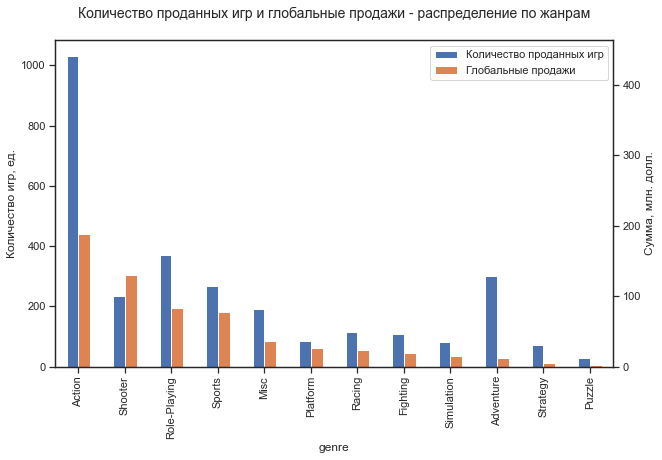

In [70]:
ax=genre_sales[['name_count', 'total_sales']].plot(kind='bar', figsize=(10, 6))
plt.title('Количество проданных игр и глобальные продажи - распределение по жанрам\n  ', fontsize=14)
plt.ylabel('Количество игр, ед.')
plt.legend(['Количество проданных игр', 'Глобальные продажи'], loc='best')

# прозрачный второй график для создания правой y-оси
genre_sales[['total_sales']].plot(kind='bar', ax=ax, alpha = 0.0, legend=False, secondary_y=True)
plt.ylabel('Сумма, млн. долл.');

#### Анализ распределения игр по жанрам<a name="analys_genre"></a> 
- Первые по продажам игры в жанре "Action" - 441,2 млн. долл.
- Вторые - "Shooter".
- Самые плохопродаваемые игры в жанрах "Adventure", "Strategy", "Puzzle"
- Игры жанра "Shooter" самые "дорогие" - показатель продаж Shooter ("share_sales") = 1,3 -- 1 игра = 1,3 млн. долларов. 
- У жанра "Sport" этот показатель почти в два раза меньше = 0,67 млн. долл - 1 игра. 
- Самые "дешевые" в этом плане Adventure = 0,09 млн. долл. - 1 игра.

## Анализ поведения пользователей из регионов NA, EU, JP<a name="analys_users"></a> 
- #### [Самые популярные игровые платформы (топ-5)](#users_platform)
    - [Анализ продаж в регионах по игровым платформам](#analys_users_platform) 
- #### [Самые популярные жанры (топ-5)](#users_genre) 
    - [Анализ продаж в регионах по жанрам](#analys_users_genre) 
- #### [Влияние рейтинга ESRB на продажи в отдельном регионе](#users_esrb) 

In [71]:
df_games_ok.head() # исходная база

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating_num,total_sales
0,grand theft auto v,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,4.0,21.05
1,grand theft auto v,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,4.0,16.27
2,call of duty: black ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,NaN,14.63
3,pokemon x/pokemon y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,NaN,14.60
4,call of duty: black ops ii,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,4.0,13.79


### Самые популярные игровые платформы (топ-5) <a name="users_platform"></a> 
Подготовим данные по продажам игр по игровым платформам, в каждом регионе NA, EU, JP

In [72]:
# данные по Северной Америке
platform_na_top5 = df_games_ok.pivot_table(
    index=['platform'], values=['na_sales'], aggfunc='sum', margins=True, margins_name='All_sales') \
    .sort_values(by='na_sales', ascending=False).head(6)

# таблица общих продаж по региону, с сумированием всех продаж, 
# с сортировкой по убыванию,
# вывод первых 6 строк (сумма продаж + топ-5 платформ) 

In [73]:
# данные по Европе
platform_eu_top5 = df_games_ok.pivot_table(
    index=['platform'], values=['eu_sales'], aggfunc='sum', margins=True, margins_name='All_sales') \
    .sort_values(by='eu_sales', ascending=False).head(6)

In [74]:
# данные по Японии
platform_jp_top5 = df_games_ok.pivot_table(
    index=['platform'], values=['jp_sales'], aggfunc='sum', margins=True, margins_name='All_sales') \
    .sort_values(by='jp_sales', ascending=False).head(6)

In [75]:
# расположение итоговых таблиц слева направо для лучше визуализации

df1_styler = platform_na_top5.style.set_table_attributes(
    "style='display:inline'").set_caption('TOP5 платформ NA')
df2_styler = platform_eu_top5.style.set_table_attributes(
    "style='display:inline'").set_caption('TOP5 платформ EU')
df3_styler = platform_jp_top5.style.set_table_attributes(
    "style='display:inline'").set_caption('TOP5 платформ JP')

display_html(df1_styler._repr_html_() + ' -|- ' +
             df2_styler._repr_html_() + ' -|- ' + df3_styler._repr_html_(), raw=True)

,na_sales
platform,
All_sales,590.970000
X360,140.050000
PS4,108.740000
PS3,103.380000
XOne,93.120000
3DS,55.310000
,eu_sales
platform,
All_sales,506.820000


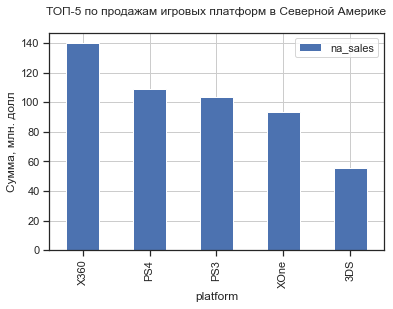

In [76]:
platform_na_top5[1:6].plot(kind='bar', grid=True)
plt.title('ТОП-5 по продажам игровых платформ в Северной Америке\n  ')
plt.ylabel('Сумма, млн. долл')
plt.legend(loc='best');

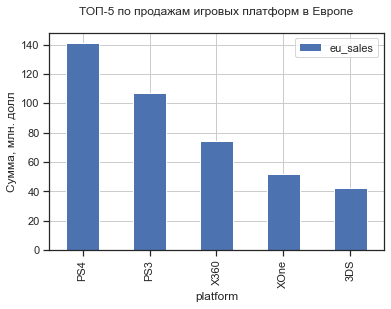

In [77]:
platform_eu_top5[1:6].plot(kind='bar', grid=True)
plt.title('ТОП-5 по продажам игровых платформ в Европе\n  ')
plt.ylabel('Сумма, млн. долл')
plt.legend(loc='best');

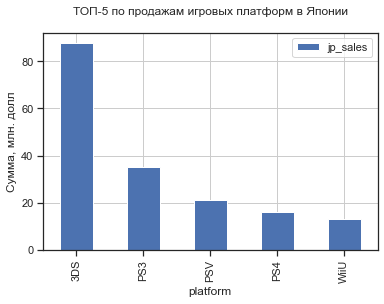

In [78]:
platform_jp_top5[1:6].plot(kind='bar', grid=True)
plt.title('ТОП-5 по продажам игровых платформ в Японии\n  ')
plt.ylabel('Сумма, млн. долл')
plt.legend(loc='best');

**Анализ продаж в регионах по платформам:** <a name="analys_users_platform"></a> 
1. Первое место по продажам - Северная Америка = 591 млн. долл, затем Европа = 507 млн. долл., третье место - Япония = 192,6 млн. долл.
- В Северной Америке и Европе набор ТОП-5 платформ один и тот же, разница только в распределении мест.
- В Северной Америке на первом месте "родная" платформа X360, в Европе - PS4 (новый международный стандарт)
- В Японии на первом месте (с большим отрывом в 2 раза) мобильная приставка 3DS - особенности менталитета и образа жизни японцев. Во первых Nintendo - родная торговая марка, на ней много контента "национального колорита", во вторых портативные приставки занимают меньше места в доме (тоже особенности Японии) и стоят дешевле настольных собратьев.
- Разница между первым и третим местом в Северной Америке = 40%, в Европе = 50%

### Самые популярные жанры (топ-5) <a name="users_genre"></a> 
Подготовим данные по продажам игр по жанрам, в каждом регионе NA, EU, JP

In [79]:
# данные по Северной Америке
genre_na_top5 = df_games_ok.pivot_table(
    index=['genre'], values=['na_sales'], aggfunc='sum', margins=True, margins_name='All_sales') \
    .sort_values(by='na_sales', ascending=False).head(6)

# таблица общих продаж по региону, с сумированием всех продаж, 
# с сортировкой по убыванию,
# вывод первых 6 строк (сумма продаж + топ-5 жанров) 

In [80]:
# данные по Европе
genre_eu_top5 = df_games_ok.pivot_table(
    index=['genre'], values=['eu_sales'], aggfunc='sum', margins=True, margins_name='All_sales') \
    .sort_values(by='eu_sales', ascending=False).head(6)

In [81]:
# данные по Японии
genre_jp_top5 = df_games_ok.pivot_table(
    index=['genre'], values=['jp_sales'], aggfunc='sum', margins=True, margins_name='All_sales') \
    .sort_values(by='jp_sales', ascending=False).head(6)

In [82]:
# расположение итоговых таблиц слева направо для лучше визуализации

df1_styler = genre_na_top5.style.set_table_attributes(
    "style='display:inline'").set_caption('TOP5 жанров NA')
df2_styler = genre_eu_top5.style.set_table_attributes(
    "style='display:inline'").set_caption('TOP5 жанров EU')
df3_styler = genre_jp_top5.style.set_table_attributes(
    "style='display:inline'").set_caption('TOP5 жанров JP')

display_html(df1_styler._repr_html_() + ' -|- ' +
             df2_styler._repr_html_() + ' -|- ' + df3_styler._repr_html_(), raw=True)

,na_sales
genre,
All_sales,590.970000
Action,177.840000
Shooter,144.770000
Sports,81.530000
Role-Playing,64.000000
Misc,38.190000
,eu_sales
genre,
All_sales,506.820000


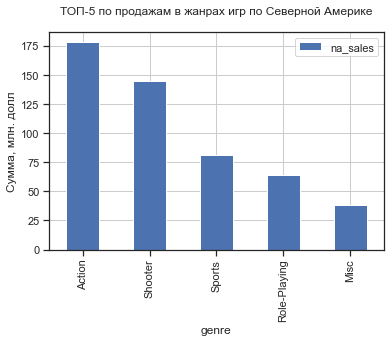

In [83]:
genre_na_top5[1:6].plot(kind='bar', grid=True)
plt.title('ТОП-5 по продажам в жанрах игр по Северной Америке\n  ')
plt.ylabel('Сумма, млн. долл')
plt.legend(loc='best');

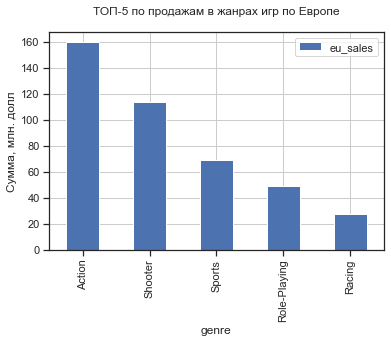

In [84]:
genre_eu_top5[1:6].plot(kind='bar', grid=True)
plt.title('ТОП-5 по продажам в жанрах игр по Европе\n  ')
plt.ylabel('Сумма, млн. долл')
plt.legend(loc='best');

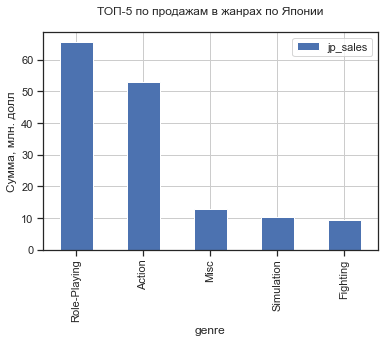

In [85]:
genre_jp_top5[1:6].plot(kind='bar', grid=True)
plt.title('ТОП-5 по продажам в жанрах по Японии\n  ')
plt.ylabel('Сумма, млн. долл')
plt.legend(loc='best');

**Анализ продаж в регионах по жанрам:**<a name="analys_users_genre"></a> 
1. Первое место по продажам - Северная Америка = 591 млн. долл, затем Европа = 507 млн. долл., третье место - Япония = 192,6 млн. долл.
- В Северной Америке и Европе набор ТОП-5 жанров одинаков по составу и по распределению мест в топе (за исключением 5 места - несовпало). 
        1. Action	 2. Shooter	  3. Sports	  4. Role-Playing  	   5.  Misc / Racing    
- В Японии свои предпочтения - на первом месте Role-Playing, далее два жанра - Action и Misc из первой пятерки других регионов и два последних Simulation и Fighting.
- Распределение в долях между жанрами из ТОП-5 примерно одинаковое во всех регионах. За исключением Японии - тут 1 и 2 место идет со значительным отрывом от других жанров.

### Влияние рейтинга ESRB на продажи в отдельном регионе<a name="users_esrb"></a> 

Этот вопрос мы уже выясняли выше. **Построим диаграмму взаимных корреляций**

In [86]:
platform_top10.head()  # общая база ТОП-10 платформ

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating_num,total_sales
0,grand theft auto v,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,4.0,21.05
1,grand theft auto v,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,4.0,16.27
2,call of duty: black ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,NaN,14.63
3,pokemon x/pokemon y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,NaN,14.60
4,call of duty: black ops ii,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,4.0,13.79


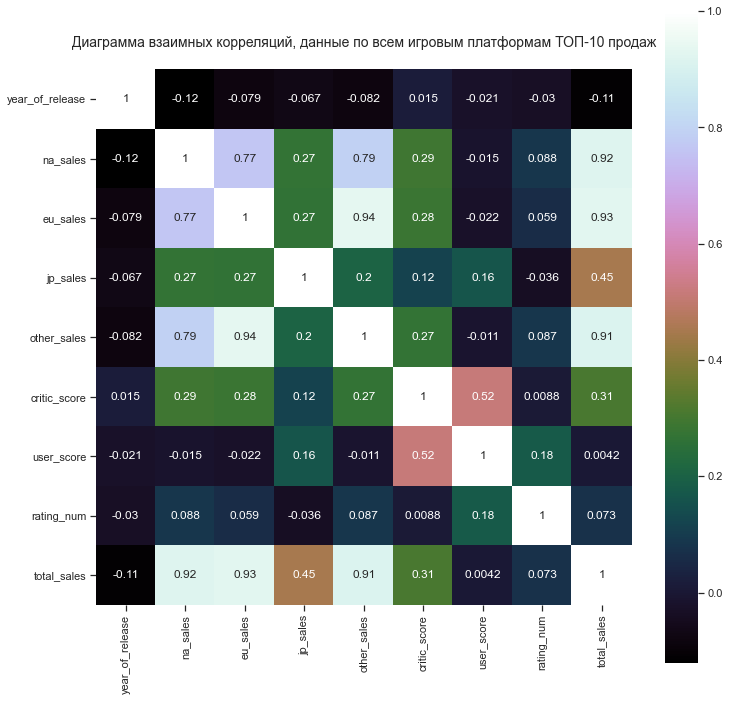

In [87]:
correlation = platform_top10.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='cubehelix')
plt.title('Диаграмма взаимных корреляций, данные по всем игровым платформам ТОП-10 продаж\n    ', fontsize=14);

**Мы предварительно обозначили рейтинг ESRB в числах. По диаграмме взаимных корреляций видно что даже по ТОП-10 платформ по продажам игр влияние рейтнга ESRB (rating_num в таблице) на продажи игр по всем регионам ОТСУТСТВУЕТ. Значение коэф. корреляций практически равны нулю.**

## Проверка гипотез <a name="gip"></a> 
- #### [Гипотеза 1 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые](#gip_1) 
    - [Проверка Гипотезы 1 - Вариант 1 (без замены NaN на среднее значение)](#gip_1_var_1)
    - [Проверка Гипотезы 1 - Вариант 2 (заменим NaN на среднее значение рейтинга)](#gip_1_var_2)
    
- #### [Гипотеза 2 - Средние пользовательские рейтинги жанров Action и Sports разные](#gip_2)
    - [Проверка Гипотезы 2 - Вариант 1 (без замены NaN на среднее значение)](#gip_2_var_1)
    - [Проверка Гипотезы 2 - Вариант 2 (заменим NaN на средние значения рейтинга)](#gip_2_var_2)

### Гипотеза 1 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые<a name="gip_1"></a> 
Проверим эту гипотезу с помощью одностороннего теста, т.е мы найдем одно из значений среднего пользовательского рейтинга и сравним его с другим через t-test   

Гипотезу будем провериять двумя вариантами 
- 1 - без замены NaN значений на средние значения по признаку
- 2 - заменим NaN на средние значения по признаку

Исходя из формулировки гипотезы принимаем **нулевую гипотезу H₀** как:   
***Средние пользовательские рейтинги платформ Xbox One равны средним пользовательским рейтингам платформы PC*** 

***Уровень значимости*** (пороговое значение) установим как ***5%*** (как общепринятый параметр)

Найдем среднее значение пользовательского рейтинга платформы РС

In [88]:
df_games_ok.head() # исходная база

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating_num,total_sales
0,grand theft auto v,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,4.0,21.05
1,grand theft auto v,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,4.0,16.27
2,call of duty: black ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,NaN,14.63
3,pokemon x/pokemon y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,NaN,14.60
4,call of duty: black ops ii,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,4.0,13.79


In [89]:
df_games_ok.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2886 entries, 0 to 2885
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2886 non-null   object 
 1   platform         2886 non-null   object 
 2   year_of_release  2886 non-null   int64  
 3   genre            2886 non-null   object 
 4   na_sales         2886 non-null   float64
 5   eu_sales         2886 non-null   float64
 6   jp_sales         2886 non-null   float64
 7   other_sales      2886 non-null   float64
 8   critic_score     1312 non-null   float64
 9   user_score       1531 non-null   float64
 10  rating           1611 non-null   object 
 11  rating_num       1611 non-null   float64
 12  total_sales      2886 non-null   float64
dtypes: float64(8), int64(1), object(4)
memory usage: 293.2+ KB


В данных по пользовательскому рейтингу есть пропущенный значения

**Проверка Гипотезы 1 - Вариант 1 (без замены NaN на среднее значение)** <a name="gip_1_var_1"></a> 

Найдем среднее значение пользовательского рейтинга по игровой платформе PC

In [90]:
mean_pc = df_games_ok.loc[df_games_ok['platform']
                          == 'PC', 'user_score'].mean(skipna=True) # среднее и без параметра "пропуск NaN" также считает.
"Значение среднего пользвательского рейтинга по платформе РС = {:.3} это наша оптимальная величина" \
    .format(mean_pc)

'Значение среднего пользвательского рейтинга по платформе РС = 6.43 это наша оптимальная величина'

Создадим таблицу данных по пользовательскому рейтингу платформы Xbox One

In [91]:
df_games_ok.platform.unique()  # правильные названия всех платформ

array(['PS3', 'X360', 'PS4', '3DS', 'DS', 'XOne', 'WiiU', 'Wii', 'PC',
       'PSV', 'PSP'], dtype=object)

In [92]:
x_one_user_score = df_games_ok.loc[df_games_ok['platform'] == 'XOne', 'user_score']
x_one_user_score.head()  # проверка

21    NaN
31    7.9
34    5.4
44    6.4
53    6.2
Name: user_score, dtype: float64

**Расчитаем значение p и проверим нулевую гипотезу с помощью одностороннего теста**

In [93]:
optimal_value = mean_pc
alpha = 0.05            # уровень статистической значимости

results = st.ttest_1samp(x_one_user_score, optimal_value,
                         nan_policy='omit')                # не учитываем NAN
print('p-значение: ', results.pvalue)

# сравним получившееся p-значение с заданным уровнем статистической значимости
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.36589435569271744
Не получилось отвергнуть нулевую гипотезу


**Нет подтверждения того, что гипотеза не верна. Мы не можем уверено утверждать как соотносятся два средних пользовательских рейтинга платформ Xbox One и PC - одинаковы они или нет**

**Проверка Гипотезы 1 - Вариант 2 (заменим NаN на среднее значение пользовательского рейтинга по платформе Xbox One)** <a name="gip_1_var_2"></a> 

In [94]:
# расчитаем среднее значение рейтинга по платформе Xbox One
x_one_user_score_mean = df_games_ok.loc[df_games_ok['platform'] == 'XOne', 'user_score'].mean()
x_one_user_score_mean

6.52142857142857

In [95]:
# заменим NaN на среднее значение рейтинга по платформе Xbox One
x_one_user_score.fillna(x_one_user_score_mean, inplace=True)
x_one_user_score

21      6.521429
31      7.900000
34      5.400000
44      6.400000
53      6.200000
          ...   
2854    8.200000
2858    6.600000
2860    6.521429
2867    6.700000
2871    6.521429
Name: user_score, Length: 247, dtype: float64

**Расчитаем значение p и проверим нулевую гипотезу с помощью одностороннего теста**

In [96]:
optimal_value = mean_pc
alpha = 0.05             # уровень статистической значимости 

results = st.ttest_1samp(x_one_user_score, optimal_value)
print('p-значение: ', results.pvalue)

# сравним получившееся p-значение с заданным уровнем статистической значимости
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.21946193049279505
Не получилось отвергнуть нулевую гипотезу


**Нет подтверждения того, что гипотеза не верна. Мы не можем уверено утверждать как соотносятся два средних пользовательских рейтинга платформ Xbox One и PC - одинаковы они или нет**

### Гипотеза 2 - Средние пользовательские рейтинги жанров Action и Sports разные.<a name="gip_2"></a> 

Проверим эту гипотезу метода проверки равенства средних двух генеральных совокупностей   

Гипотезу будем провериять двумя вариантами 
- 1 - без замены NaN значений на средние значения по признаку
- 2 - заменим NaN на средние значения по признаку

Исходя из формулировки гипотезы принимаем **нулевую гипотезу H₀** как:   
***Средние пользовательские рейтинги жанров Action и Sports одинаковы***

***Уровень значимости*** (пороговое значение) установим как ***1%*** (вероятность возможного подтверждения H₀ очень мала)

**Проверка Гипотезы 2 - Вариант 1 (без замены NaN на среднее значение)** <a name="gip_2_var_1"></a> 

Подготовим данные

In [97]:
# данные по жанру Action
action_user_score = df_games_ok.loc[df_games_ok['genre'] == 'Action', 'user_score']
action_user_score

0       8.2
1       8.1
6       8.3
15      6.6
27      6.9
       ... 
2875    NaN
2878    NaN
2879    7.6
2880    NaN
2883    NaN
Name: user_score, Length: 1031, dtype: float64

In [98]:
# данные по жанру Sport
sports_user_score = df_games_ok.loc[df_games_ok['genre'] == 'Sports', 'user_score']
sports_user_score

14      4.3
19      5.0
26      4.3
28      5.7
52      4.5
       ... 
2781    NaN
2785    4.5
2811    1.4
2857    NaN
2858    6.6
Name: user_score, Length: 268, dtype: float64

**Расчитаем значение p и проверим нулевую гипотезу**

In [99]:
alpha = 0.01  # уровень статистической значимости

results = st.ttest_ind(action_user_score, sports_user_score,
                       equal_var=False, nan_policy='omit')    # не учитываем NaN
print('p-значение:', results.pvalue)

# сравним получившееся p-значение с заданным уровнем статистической значимости
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.2430777657264175e-20
Отвергаем нулевую гипотезу


**Гипотеза верна - Средние пользовательские рейтинги жанров Action и Sports разные.**

**Проверка Гипотезы 2 - Вариант 2 (заменим NаN на средние значения пользовательского рейтинга по жанрам Action и Sports)** <a name="gip_2_var_2"></a> 

Подготовим данные

In [100]:
# расчитаем среднее значение пользовательского рейтинга по жанру Action
action_user_score_mean = df_games_ok.loc[df_games_ok['genre'] == 'Action', 'user_score'].mean(skipna=True)
action_user_score_mean

6.825047801147237

In [101]:
# заменим NaN на среднее по рейтингу
action_user_score.fillna(action_user_score_mean, inplace=True)
action_user_score

0       8.200000
1       8.100000
6       8.300000
15      6.600000
27      6.900000
          ...   
2875    6.825048
2878    6.825048
2879    7.600000
2880    6.825048
2883    6.825048
Name: user_score, Length: 1031, dtype: float64

In [102]:
# расчитаем среднее значение пользовательского рейтинга по жанру Sport
sports_user_score_mean = df_games_ok.loc[df_games_ok['genre'] == 'Sports', 'user_score'].mean(skipna=True)
sports_user_score_mean

5.455897435897437

In [103]:
# заменим NaN на среднее по рейтингу
sports_user_score.fillna(sports_user_score_mean, inplace=True)
sports_user_score

14      4.300000
19      5.000000
26      4.300000
28      5.700000
52      4.500000
          ...   
2781    5.455897
2785    4.500000
2811    1.400000
2857    5.455897
2858    6.600000
Name: user_score, Length: 268, dtype: float64

**Расчитаем значение p и проверим нулевую гипотезу**

In [104]:
alpha = 0.01  # уровень статистической значимости

results = st.ttest_ind(action_user_score, sports_user_score, equal_var=False)
print('p-значение:', results.pvalue)

# сравним получившееся p-значение с заданным уровнем статистической значимости
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.4717911522133258e-36
Отвергаем нулевую гипотезу


Исход тот же **Гипотеза верна - Средние пользовательские рейтинги жанров Action и Sports разные.**

Только p-значение стало еще меньше. Не факт что это правильный(нужный) подход замены NAN значений.

## Заключение<a name="end"></a> 
#### Данные для проведения исследования
1. Часть данных потребовалось перевести в нижний регистр написания букв - названия столбцов, название игр(чтобы исключить пропуск дубликатов)
2. Обнаружены пропуски - по значениям рейтингов от 40 до 50% от всех данных, по названиям игр и жанров - 0,01%, по году выпуска игр - 1,61%
3. По столбцу `Year_of_Release` нужно было заменить тип данных на datatime
4. По столбцам рейтингов нужно было заменить типы данных на числовые, по возможности на целочисленные

#### Итог проведенной предобработки данных
1. Названия столбцов и игр перевели в нижний регистр.
2. Проверили и удалили пропуски по названию игры и жанру - 2 записи.
3. Проверили и удалили пропуски по признаку "год выпуска". В части записей - год релиза восстановили по названию игры.
4. Провели оценку возможности замены пропущенных значений в рейтингах - решили замену отсутствующих значений не проводить, без необходимости связанной с вычислениями и анализом данных в соответствующих заданиях.
5. Данные "год выпуска" перевели в формат "int64" 
6. Значений "TBD" обнаруженные в рейтинге, заменили на NaN в соответствии со смыслом выражения "TBD" - рейтинг должен быть определен.
7. Оптимизировали данные по рейтингу ESRB, руководствуясь официальной информацией и терминологией ESRB - количество категорий сократили до 4.
8. Создали числовой аналог столбца рейтинга ESRB для возможности внести этот рейтинг в анализ корреляции.
9. Проверили базу на наличие дубликатов - дубликатов нет. Предварительно проверили названия игр, жанров, платформ, на уникальность во избежании пропуска дубликатов.
10. Провели переиндексацию данных.

#### Анализ данных
1. **Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?**    
    В базе представлена информация по выходу игр с 1980 по 2016 гг. Первые 10-12 лет количество игр не превышало 100 ед. Рост продаж начался с 1994-1995 гг. (около 200 ед.). Пик продаж пришелся на 2008-2009 гг.(1425 ед.) После этого периода продажи игр стабильно снижаются. С точки зрения продаж интересен период с 1997 по 2016 гг. в том числе из-за наличия внятного числа рейтингов появившихся в этот период.   
    
    
2. **Продажи игр по платформам**.   
    ТОП-6 платформ по продажам за весь период наблюдений - PS2, X360, PS3, Wii, DS, PS.    
    Объем продаж по этим платформам от 1200 до 700 млн. долл.      
    Характерный "срок жизни" более менее успешных платформ - 10 лет(+/-2 года)
    
    
3. **Определить актуальный период для иссследования** 
    На базе предварительного анализа глобальных продаж продаж определили **актуальный период до 5 лет - с 2012 по 2016 гг. (включительно)**. Если рассматривать тот факт что срок жизни платформ - 10 лет, то если брать период последние 5 лет, в него попадут платформы которые все еще активны на рынке. 
    
    
4. **Анализ нескольких потенциально прибыльных платформ**
    Самыми успешными по продажам в эти 5 лет были Х360, PS3, PS4, XOne и Wii. По этим данным провели анализ продаж. В период 2012-2016 гг. по всем платформам снижается глобальная выручка в том числе в ТОР10 платформ.Медианные значения у этой группы выше чем у остальных - значит снижение продаж было либо позже чем у остальных, либо не таким резким было падение.     



5. **Влияние на продажи внутри одной популярной платформы отзывов пользователей и критиков**    
    Выбрали для анализа PS4 как лидера по глобальным продажам.
    - Северная Америка, Европа и другие страны вносят заметный вклад в глобальные продажи игр на PS4 - высокое значение корреляции = 0,93 - 0,96. У Японии этот показатель меньше = 0,53, т.е. влияние Японии на глобальные продажи мало. 
    - Связь между объемами продаж и отзывами критиков и пользователей есть (но слабо выраженное) - лучше продаются те игры на которые больше положительных отзывов. По всем регионам (кроме Японии) и по общим продажам - в пределах 0,35-0,42 ед. корреляции. В Японии влияние каких-либо рейтингов на продажи игр ничтожно мало.
    - Отзывы критиков действительно не сильно влияют на оценки пользователей - тут коэф. корреляции = 0,56.
    - В основном оценки критиков и пользователей выше среднего, примерно 3/4 от максимума
    - Встречаются высокие единичные оценки на игры которые плохо продаются. 
    - Рейтинг ESRB не оказывает заметного влияния на другие показатели. 

 
6. **Влияние на продажи игр отзывов пользователей и критиков по другим игровым платформам**
    - Также продажи по Северной Америке, Европе и других странах это важные величины для глобальных продаж других платформ, коэф. корреляции = 0,89 - 0,95 ед., по Японии показатель стал ниже = 0,49 vs 0,53 ед.
    - Влияние отзывов критиков на продажи стало заметно меньше - 0,28 (в среднем) vs 0,41 ед. Все остальные рейтинги никак не влияют на продажи - значение корреляций ничтожно мало. Естественная тенденция сохраняется - лучше продаются те игры на которые больше положительных отзывов. Есть часть малопродаваемых игр с положительными отзывами.
    - Также в Японии влияние каких-либо рейтингов на продажи игр ничтожно мало.
    - Отзывы критиков также мало влияют на оценки пользователей = 0,51 vs 0,53 ед.
    - Основные отзывы критиков и пользователей это показатели оценок выше среднего и до 3/4 от максимума.
    - Встречаются высокие единичные оценки на игры которые плохо продаются. 
    - Рейтинг ESRB не оказывает заметного влияния на другие показатели 
    
   
7. **Анализ прибильности игр по жанрам**
    - Первые по продажам игры в жанре "Action" - 441,2 млн. долл.
    - Вторые - "Shooter".
    - Самые плохопродаваемые игры в жанрах "Adventure", "Strategy", "Puzzle"
    - Игры жанра "Shooter" самые "дорогие" - показатель продаж Shooter ("share_sales") = 1,3 -- 1 игра = 1,3 млн. долларов. 
    - У жанра "Sport" этот показатель почти в два раза меньше = 0,67 млн. долл - 1 игра. 
    - Самые "дешевые" в этом плане "Adventure" = 0,09 млн. долл. - 1 игра.

        
####  Портрет пользователя каждого региона
Определили для пользователя каждого региона (NA, EU, JP):
1. **Самые популярные платформы (топ-5)**
    - Первое место - Северная Америка = 591 млн. долл., затем Европа = 507 млн. долл., 3 место - Япония = 192,6 млн. долл.
    - В Северной Америке и Европе набор ТОП-5 платформ один и тот же, разница только в распределении мест.
            X360 - PS4 - PS3 - XOne - 3DS
    - В Северной Америке на первом месте "родная" платформа X360, в Европе - PS4 (новый международный стандарт)
    - В Японии на первом месте (с большим отрывом в 2 раза) мобильная приставка 3DS - особенности менталитета и образа жизни японцев.
    - Разница между первым и третим местом в Северной Америке = 40%, в Европе = 50%
    
       
2. **Самые популярные жанры (топ-5)**
    - В Северной Америке и Европе набор ТОП-5 жанров одинаков по составу и по распределению мест в топе (за исключением 5 места - несовпало). 
        1. Action	 2. Shooter	  3. Sports	  4. Role-Playing  	   5.  Misc / Racing    
    - В Японии свои предпочтения - на первом месте Role-Playing, далее два жанра - Action и Misc из первой пятерки других регионов и два последних Simulation и Fighting.
    - Распределение в долях между жанрами из ТОП-5 примерно одинаковое во всех регионах. За исключением Японии - тут 1 и 2 место идет со значительным отрывом от других жанров.
      
      
      
3. **Влияние рейтинга ESRB на продажи в отдельном регионе**
Проанализировали данные по методу взаимных коррреляций признаков. Анализ покащал что влияние рейтнга ESRB на продажи игр по всем регионам ОТСУТСТВУЕТ. Значение коэф. корреляций практически равны нулю.

####  Проверка гипотез
- **Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**    
Проверили гипотезу с помощью одностороннего теста. Исходя из формулировки приняли нулевую гипотезу H₀ как: *Средние пользовательские рейтинги платформ Xbox One равны средним пользовательским рейтингам платформы PC*. Уровень значимости установили как 5%(общепринятый параметр)   
Сделали два варианта расчетов: 1 - без замены NaN на средние значения по признаку, 2 - заменили NaN на средние значения по признаку.  
Итог - **Нет подтверждения того, что гипотеза не верна. Мы не можем уверено утверждать как соотносятся два средних пользовательских рейтинга платформ Xbox One и PC - одинаковы они или нет**


- **Средние пользовательские рейтинги жанров Action и Sports разные**    
Проверили гипотезу методом проверки равенства средних двух генеральных совокупностей. Исходя из формулировки гипотезы приняли нулевую гипотезу H₀ как: *Средние пользовательские рейтинги жанров Action и Sports одинаковы*. Уровень значимости установили как 1% (вероятность возможного подтверждения H₀ очень мала). Сделали два варианта расчетов: 1 - без замены NaN на средние значения по признаку, 2 - заменили NaN на средние значения по признаку.    
Итог - **Гипотеза верна - Средние пользовательские рейтинги жанров Action и Sports разные.**